# Packages

In [2]:
using Pkg
using Plots
using Random

In [3]:
using Dates
using DataFrames
using Statistics
using AlphaVantage

In [6]:

using Distributions
using HypothesisTests
using FractionalCalculus
using Downloads
using CSV

# Include jl file

In [18]:
include("Differentiation.jl")

minFFD

# Data

In [8]:
dir = "https://raw.githubusercontent.com/risk-labratory/data/main/"
url = string(dir, "IVE_2020.csv")
p = Downloads.download(url, "Data.csv")

"Data.csv"

In [9]:
df = CSV.read("Data.csv", DataFrames.DataFrame, header=0)
delete!(df, 1)
DataFrames.rename!(df, :Column1 => :dates,:Column2 => :price, :Column3 => :bid, :Column4 => :ask, :Column5 => :size)
df.dates = DateTime.(df.dates, "yyyy-mm-dd HH:MM:SS")
df.price = parse.(Float64, df.price)
df.bid = parse.(Float64, df.bid)
df.ask = parse.(Float64, df.ask)
df.size = parse.(Float64, df.size)
df = df[(hour.(df.dates) .>= 9 .&& hour.(df.dates) .< 16), :]
first(df, 10)

,dates,price,bid,ask,size
,DateTime,Float64,Float64,Float64,Float64
1,2020-01-02T09:30:00,130.68,130.59,130.6,20625.0
2,2020-01-02T09:30:01,130.5,130.5,130.77,200.0
3,2020-01-02T09:30:04,130.53,130.52,130.78,100.0
4,2020-01-02T09:30:04,130.55,130.52,130.78,100.0
5,2020-01-02T09:30:04,130.53,130.52,130.78,200.0
6,2020-01-02T09:30:04,130.54,130.52,130.78,100.0
7,2020-01-02T09:30:04,130.53,130.52,130.78,300.0
8,2020-01-02T09:30:04,130.52,130.52,130.78,100.0
9,2020-01-02T09:30:04,130.52,130.52,130.78,200.0


In [11]:
ohlcvDataframe = timeBar(df, 1440)
first(ohlcvDataframe, 10)

,dates,Open,High,Low,Close,Volume,ValueOfTrades
,DateTime,Float64,Float64,Float64,Float64,Float64,Float64
1,2020-01-02T00:00:00,130.68,130.78,129.938,130.57,1.42182e6,130.182
2,2020-01-03T00:00:00,129.33,129.987,129.291,129.64,526340.0,129.752
3,2020-01-06T00:00:00,129.0,129.895,128.93,129.895,655431.0,129.548
4,2020-01-07T00:00:00,129.52,129.58,129.141,129.38,413423.0,129.377
5,2020-01-08T00:00:00,129.38,130.3,129.24,129.76,449383.0,129.882
6,2020-01-09T00:00:00,130.3,130.38,129.92,130.317,376142.0,130.161
7,2020-01-10T00:00:00,130.49,130.578,129.692,129.87,250094.0,130.17
8,2020-01-13T00:00:00,130.05,130.32,129.71,130.305,269836.0,130.089
9,2020-01-14T00:00:00,130.18,130.75,130.07,130.48,416544.0,130.395


In [12]:
close = ohlcvDataframe[:, [:dates, :Close]]
close.dates = Date.(close[:,1])
first(close, 10)

,dates,Close
,Date,Float64
1,2020-01-02,130.57
2,2020-01-03,129.64
3,2020-01-06,129.895
4,2020-01-07,129.38
5,2020-01-08,129.76
6,2020-01-09,130.317
7,2020-01-10,129.87
8,2020-01-13,130.305
9,2020-01-14,130.48


# Snippet 5.1

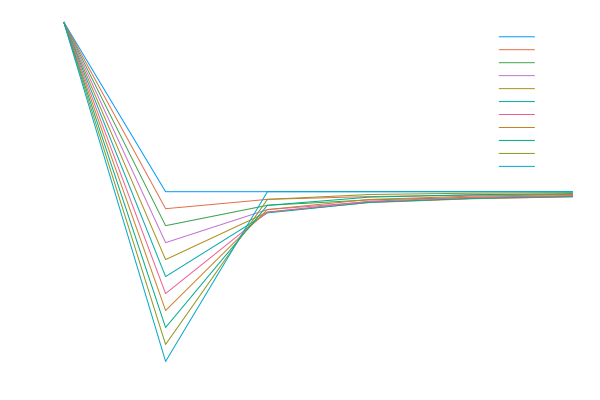

In [19]:
plotWeights([0, 1], 11, 6)

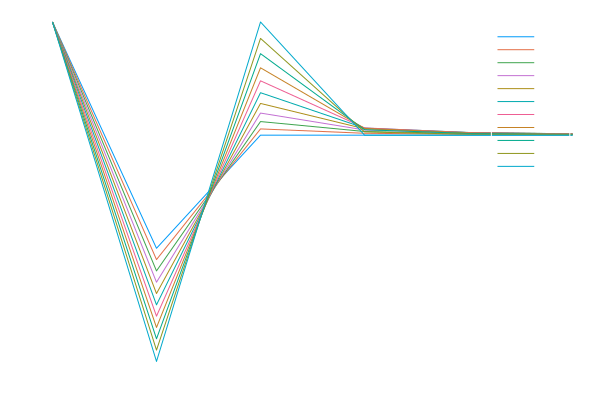

In [21]:
plotWeights([1, 2], 11, 6)

# Snippet 5.2

In [22]:
first(fracDiff(close, 0.4, 0.01), 15)

,index,value
,Date,Any
1,2020-07-27,11.0134
2,2020-07-28,10.867
3,2020-07-29,12.1087
4,2020-07-30,10.3563
5,2020-07-31,10.3423
6,2020-08-03,10.7888
7,2020-08-04,11.2884
8,2020-08-05,11.6427
9,2020-08-06,11.2446


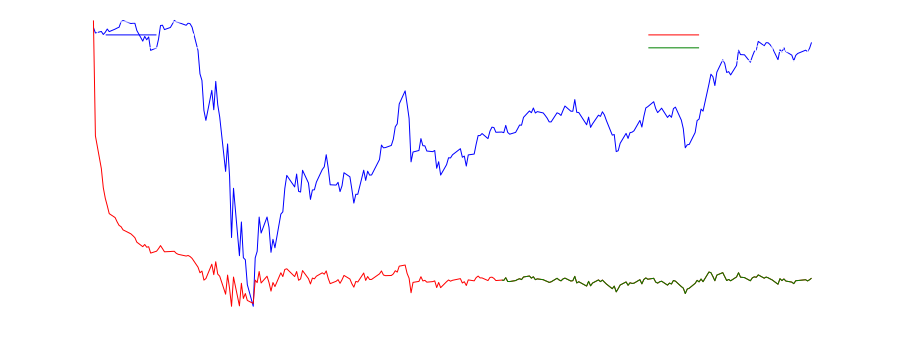

In [25]:
closeFD = fracDiff(close, 0.4, 1)
closeFDC = fracDiff(close, 0.4, 0.01)
pt = Plots.plot(close[!, 1], close[!, 2], linecolor = :blue, size = (900, 350),
                label = "close", ylabel = "close price", legend = :topleft, grid = :off, 
                xlabel = "dates", left_margin = 5Plots.mm, right_margin = 15Plots.mm, background = :transparent)
subplot = twinx()
pt = Plots.plot!(subplot, closeFD[!, 1], closeFD[!, 2], linecolor = :red, size = (900, 350),
                label = "Diff", ylabel = "Diff Return", legend = :topright, box=:on, grid = :off, 
                 xlabel = "dates", left_margin = 5Plots.mm, right_margin = 15Plots.mm, background = :transparent)

pt = Plots.plot!(subplot, closeFDC[!, 1], closeFDC[!, 2], linecolor = :green, size = (900, 350),
                 label = "Diff Controlled", ylabel = "Diff Return", legend = :topright, box=:on, grid = :off, 
                 xlabel = "dates", left_margin = 5Plots.mm, right_margin = 15Plots.mm, background = :transparent)

In [27]:
savefig("pt")

# Snippet 5.3

In [29]:
first(fracDiffFixed(close, 0.3, 1e-3), 10)

,index,value
,Date,Any
1,2020-04-06,22.4814
2,2020-04-07,21.4264
3,2020-04-08,24.9218
4,2020-04-09,25.7826
5,2020-04-13,22.6181
6,2020-04-14,24.9019
7,2020-04-15,21.1744
8,2020-04-16,21.6361
9,2020-04-17,25.5267


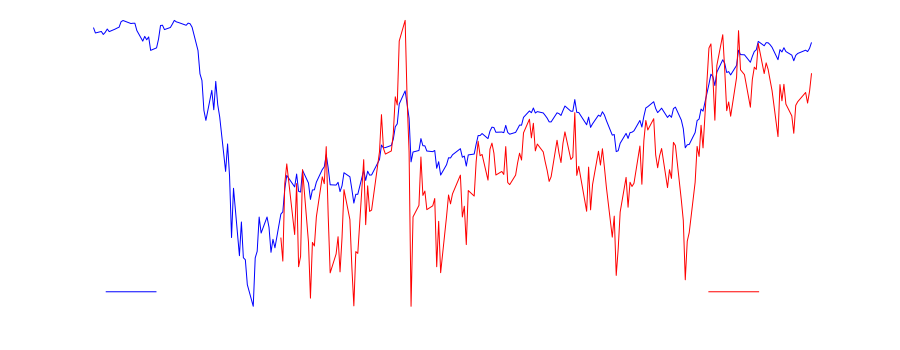

In [34]:
closeffd = fracDiffFixed(close, 0.3, 1e-3)
pt = Plots.plot(close[!, 1], close[!, 2], linecolor = :blue, size = (900, 350),
                label = "close", ylabel = "close price", legend = :bottomleft, grid = :off, 
                xlabel = "dates", left_margin = 5Plots.mm, right_margin = 15Plots.mm, background = :transparent)
pt = Plots.plot!(twinx(), closeffd[!, 1], closeffd[!, 2], linecolor = :red,
                label = "FDD", ylabel = "Diff Return", legend = :bottomright, grid = :off, box = :on,
                xlabel = "dates", left_margin = 5Plots.mm, right_margin = 15Plots.mm, background = :transparent)


In [35]:
savefig("pt")

# Snippet 5.4

In [ ]:
out = minffd(ohlcvdataframe)

In [ ]:
pt = Plots.plot(out[!, 1], out[!, :corr], linecolor = :blue, size = (900, 350),
                label = "corr", ylabel = "corr", legend = :topleft, grid = :off, 
                left_margin = 5Plots.mm, right_margin = 15Plots.mm)
pt = Plots.plot!(twinx(), out[!, 1], out[!, :adfStat], linecolor = :red, size = (900, 350),
                label = "adfStat", ylabel = "adfStat", legend = :topright, grid = :off, box = :on,
                left_margin = 5Plots.mm, right_margin = 15Plots.mm)
pt = hline!([[NaN] mean(out[:, :nintyfiveperconf])], label="", linecolor = :green, size = (900, 350))